https://www.kaggle.com/competitions/goodreads-books-reviews-290312/data?select=goodreads_train.csv

In [1]:
#libraries used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_test = pd.read_csv(r"C:\Users\ITN1\OneDrive - UPV\Escritorio\Data Science\Data Science Practice\Datasets\goodreads_test.csv")
df_train = pd.read_csv(r"C:\Users\ITN1\OneDrive - UPV\Escritorio\Data Science\Data Science Practice\Datasets\goodreads_train.csv")

In [3]:
df_test.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,Sat Nov 10 06:06:13 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sun Nov 11 05:38:36 -0800 2012,Sat Nov 10 00:00:00 -0800 2012,1,0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",Fri Nov 09 21:55:16 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Sat Nov 10 05:41:49 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,1,0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,Fri Nov 09 00:25:50 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Sat Nov 10 06:14:10 -0800 2012,Fri Nov 09 00:00:00 -0800 2012,0,0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,Thu Nov 01 00:28:39 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Sat Nov 03 11:35:22 -0700 2012,Thu Nov 01 00:00:00 -0700 2012,0,0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,Thu Oct 18 00:57:00 -0700 2012,Mon Apr 01 23:00:51 -0700 2013,Sat Mar 30 00:00:00 -0700 2013,Fri Mar 29 00:00:00 -0700 2013,0,0


In [4]:
df_train.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In this competition you will work with a challenging dataset consisting reviews from the Goodreads book review website, and a variety of attributes describing the items. and you have to predict review rating which ranges from 0 to 5.

#### Descriptive Statistics of the Entire Dataset

In [5]:
df_train.isna().sum()/len(df_train)*100

user_id          0.000000
book_id          0.000000
review_id        0.000000
rating           0.000000
review_text      0.000000
date_added       0.000000
date_updated     0.000000
read_at         10.196222
started_at      30.477444
n_votes          0.000000
n_comments       0.000000
dtype: float64

In [6]:
df_test.isna().sum()/len(df_test)*100

user_id          0.000000
book_id          0.000000
review_id        0.000000
review_text      0.000000
date_added       0.000000
date_updated     0.000000
read_at          8.885997
started_at      29.923457
n_votes          0.000000
n_comments       0.000000
dtype: float64

One of my initial ideas when I first saw the dataframe was to use the number of days it takes to read the book as a variable which might help in defining the rating. This is difficult to do now that I see that this data is missing in 30% of the values. I will keep this in mind and try to find a solution for it later on. 

In either case, this exercise shows the only two data points missing are started_at (at an average of 30% for df_train and df_test) and read_at (at an average of 9% missing data points).

In [7]:
#These will be useful later on
df_train['num_words'] = df_train['review_text'].apply(lambda x: len(x.split()))
df_test['num_words'] = df_test['review_text'].apply(lambda x: len(x.split()))

df_all = pd.concat([df_train, df_test])

Text(0.5, 1.0, 'Countplot for Ratings')

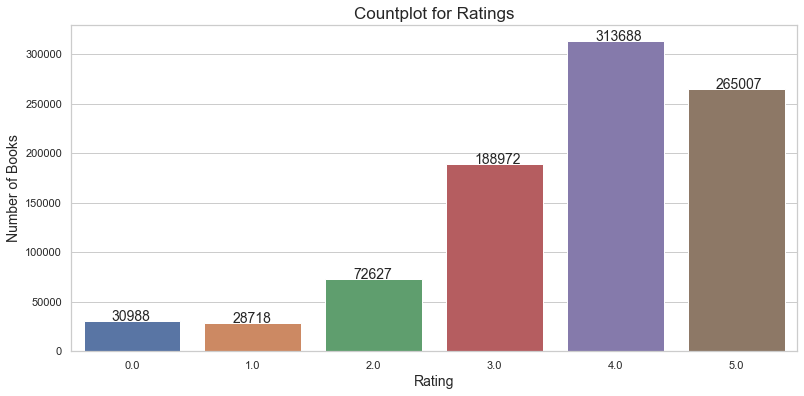

In [8]:
#Increase the size of the plot
sns.set(rc = {'figure.figsize':(13,6)})
#Rating Visualization
sns.set_style("whitegrid")

ax = sns.countplot(x = "rating", 
           data = df_all)

#Add Annotations for Each column
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.23, p.get_height()+155),
               fontsize = 14)
    
ax.set_xlabel("Rating", fontsize = 14)
ax.set_ylabel("Number of Books", fontsize = 14)
ax.set_title("Countplot for Ratings", fontsize = 17)

In [9]:
#Percentage of Each Rating

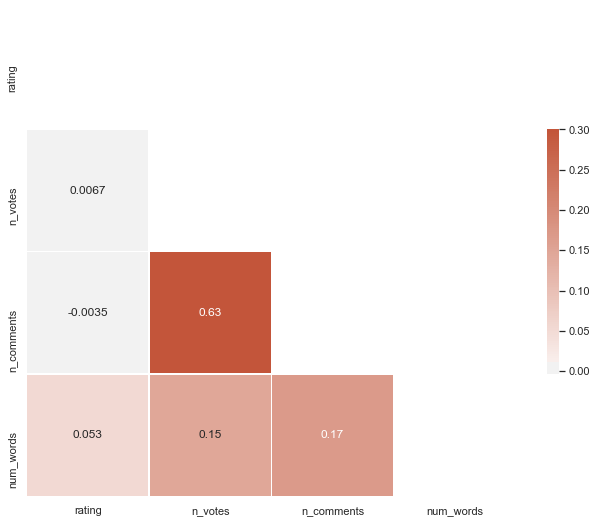

In [10]:
sns.set_style("white")

#correlation matrix
corr_matrix = df_train[['rating', 'n_votes', 'n_comments', 'num_words']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           annot = True)

Next, I try to see whether there is a relationship between the number of votes for each rating. I try plotting it using boxplits but only get a flatline for each box. This allows me to assume that for each rating, the number of votes are quite close to each other on average. So maybe the best way to visualize this is a barplot instead. 

Text(0.5, 1.0, 'Number of Votes per Rating')

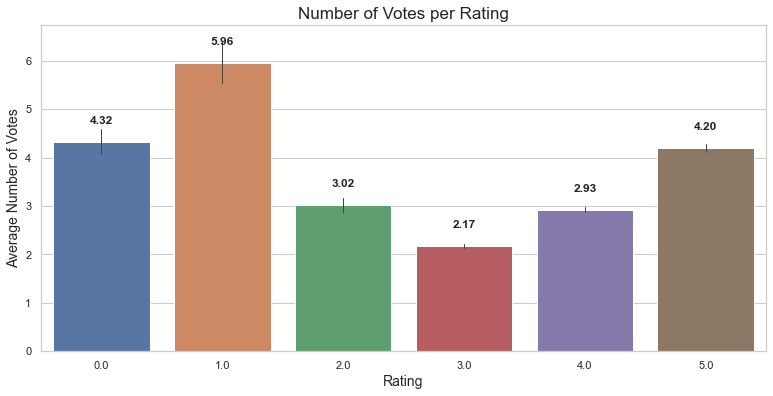

In [11]:
#n_votes per rating
sns.set_style("whitegrid")

ax_2 = sns.barplot(x = "rating",
                  y = "n_votes",
                  data = df_all,
                  errwidth = 1)

#Increase the size of the plot
sns.set(rc = {'figure.figsize':(13,6)})

for p in ax_2.patches:
    ax_2.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.25), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', 
                 weight = "bold")

ax_2.set_xlabel("Rating", fontsize = 14)
ax_2.set_ylabel("Average Number of Votes", fontsize = 14)
ax_2.set_title("Number of Votes per Rating", fontsize = 17)

Text(0.5, 1.0, 'Number of Comments per Rating')

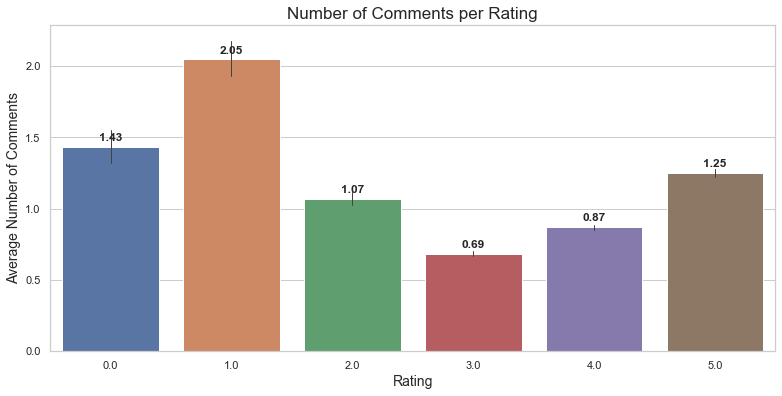

In [12]:
#n_comments per rating
sns.set_style("whitegrid")

ax_3 = sns.barplot(x = "rating",
                  y = "n_comments",
                  data = df_all,
                  errwidth = 1)

#Increase the size of the plot
sns.set(rc = {'figure.figsize':(13,6)})

for p in ax_3.patches:
    ax_3.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', 
                 weight = "bold")

ax_3.set_xlabel("Rating", fontsize = 14)
ax_3.set_ylabel("Average Number of Comments", fontsize = 14)
ax_3.set_title("Number of Comments per Rating", fontsize = 17)

Now, let's work on some text analysis. We'll start with easier ones on how long the size of each comment is.

Text(0.5, 1.0, 'Number of Words per Rating')

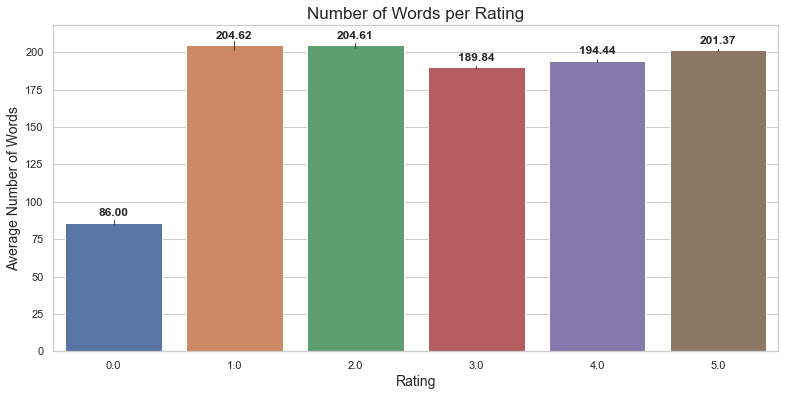

In [13]:
#n_words per rating
sns.set_style("whitegrid")

ax_3 = sns.barplot(x = "rating",
                  y = "num_words",
                  data = df_all,
                  errwidth = 1)

#Increase the size of the plot
sns.set(rc = {'figure.figsize':(13,6)})

for p in ax_3.patches:
    ax_3.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.25), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', 
                 weight = "bold")

ax_3.set_xlabel("Rating", fontsize = 14)
ax_3.set_ylabel("Average Number of Words", fontsize = 14)
ax_3.set_title("Number of Words per Rating", fontsize = 17)

Top Words Used in the Reviews:

In [14]:
from wordcloud import WordCloud,STOPWORDS

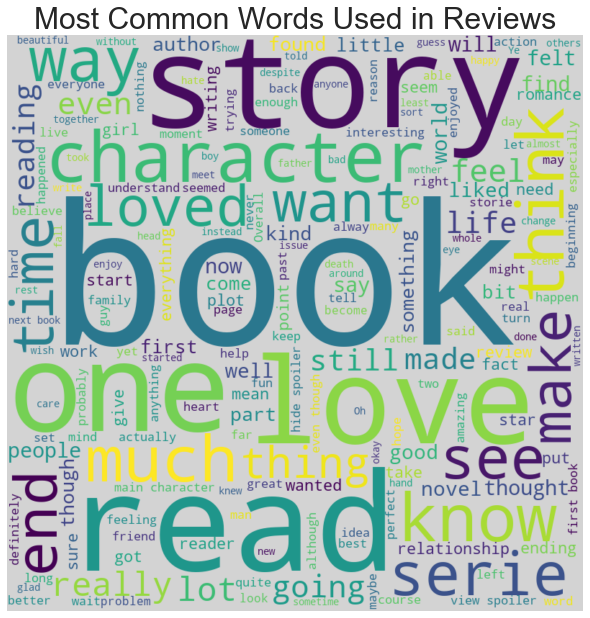

In [15]:
#Pick a random sample
text = df_all.sample(frac = 0.1)['review_text']

wordCloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color = 'lightgrey',
                     min_font_size = 10).generate("".join(text.values))

plt.figure(figsize = (8, 8),
          facecolor = None)

plt.imshow(wordCloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Most Common Words Used in Reviews",fontsize=30)
plt.show()

#### Preparing the Text Data

When we look at the raw text data, we realize the importance of:
- Dropping the urls from the reviews 
- The importance of words such as: "Woah! Wow! Smoking!"
- The importance of explamation marks

In [229]:
#removing stopwords. Look through the stop words to make sure that in this specific context, you are not removing very useful information. 
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

#add words that aren't in the NLTK stopwords list
stop_words = stop_words.union(["i've", "they've", "he've", "they're"])

#remove words that are in NLTK stopwords list
#not_stopwords = {"would", "should", "wouldn't", "shouldn't"} 
stop_words = set([word for word in stop_words if word not in {"would", "should", "wouldn't", "shouldn't"}])

print(stop_words)



#stopwrds = nltk.corpus.stopwords.words('english')
#stopwrds.extend(new_stopwords)


#I think words like wouldn't & won't and would are important because they may be significant in highlighting whether or not someone would "recommend" this book to another person
#stopwords = set(stopwords.words('english'))

#for i in ("i've", "they've", "he've", "they're"):
#    stopwords.append(i)
#stopwords = stopwords - set(("would", "should", "wouldn't", "shouldn't"))

#stopwords = nltk.corpus.stopwords.words('english')
#newStopWords = ['stopWord1','stopWord2']
#stopwords.extend(newStopWords)

#print(stopwords)


{'am', 'if', "wasn't", 'all', 'under', 'did', 'its', 'her', 'once', 'yours', 'themselves', 'any', 'and', 'too', 'theirs', 'no', 'so', 'an', 'same', "he've", 'there', "haven't", 'y', 'haven', 'myself', 'hasn', 'itself', 'don', 'about', 'in', 'was', 're', 'it', "they've", 'won', "needn't", 'yourself', 'or', 'ma', 's', 'were', "hadn't", "you're", 'we', 'here', 'being', 'have', 'just', 'his', 'more', "weren't", 'above', 'both', "don't", 'mightn', 'not', 'didn', 'when', 'from', "that'll", 'wouldn', 'other', 'the', 'this', "mustn't", 'shan', 'they', 'now', 'where', 'then', 'ain', 'she', 'below', 'as', 'few', 'further', 'through', "she's", 'again', 'be', 'which', 'who', 'our', 'my', 'their', 'on', 'him', 'with', 'ours', 'after', 'during', 'whom', 'very', 'do', 'between', 'wasn', 'over', 'most', 'your', 'herself', "couldn't", "hasn't", 't', 'than', "you've", 'because', 'for', "doesn't", 'to', 'hers', 'before', 'hadn', 'himself', "didn't", 'needn', 'me', 'couldn', 'd', 'shouldn', 'against', 'th

In [140]:
#I also want to keep the ! and the "'" in the sentence because I think they add to the sentament of the statement

import re
import string
#print(string.punctuation)
from nltk.tokenize import word_tokenize

punctuations = string.punctuation[1:6] + string.punctuation[7:]
#print(punctuations)

In [199]:
def cleanTextData(reviews_text):
    #remove url content
    reviews_text = re. sub(r"\S*https?:\S*", "", reviews_text)
    
    punctuations =  string.punctuation.replace('!','')
    punctuations =  string.punctuation.replace("'",'')
    
    cleaned_text = re.sub(r'[{}]'.format(punctuations),'', reviews_text)
    #print(cleaned_text)
    
    #cleaned_text = [word for word in reviews_text if word not in punctuations]
    
    #remove unnecessary punctuations and lowercase the words
    cleaned_text = cleaned_text.lower()
    
    
    cleaned_text = [word for word in cleaned_text.split() if word not in stopwords]
    cleaned_text = ' '.join(cleaned_text)
    
    #remove stopwords
    return cleaned_text

In [204]:
#Just to test if my function is working
df_train['cleaned_text'] = df_train['review_text'].apply(lambda x: cleanTextData(x))


#df_train_sample['text_token'] = df_train_sample['cleaned_text'].apply(lambda x: word_tokenize(x))

Will need to turn the text data into a TF-IDF Count Vectorizer in order to be used in the model

This is useful but I am not sure how to link the part above, where I clean the data in my own way to this: https://www.kaggle.com/code/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments/notebook 


Things to consider:
- Do I want to use a Count or a TF-IDF vectorizer?
- Min_df or Max_df
- How do I keep the exclamation marks? Used: token_vectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

When creating the TF-IDF, you fit on the training model and then you transform on both the training & the test model.

In [214]:
#Seperate your own train dataset to another train and test set 
from sklearn import model_selection 


x = df_train['cleaned_text']
y = df_train['rating']

x_train, y_train, x_test, y_test = model_selection.train_test_split(x, y, 
                                                    test_size = 0.2)

KeyboardInterrupt: 

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word', 
                                 ngram_range = (1, 2), 
                                 min_df = 0.3, 
                                 max_df = 0.9)

tfidfvectorizer.fit(x_train)

x_train_word_features = tfidfvectorizer.transform(x_train)
x_test_word_features = tfidfvectorizer.tranform(x_test)

#N-Grams: How should I decide whether or not I should use it in my model?

TfidfVectorizer()

In [210]:

tfidfvectorizer.vocabulary_

{'often': 197,
 'read': 229,
 'books': 28,
 'author': 15,
 'back': 17,
 'especially': 91,
 'series': 258,
 'mixed': 184,
 'feelings': 103,
 'slammed': 265,
 'colleen': 46,
 'hoover': 144,
 'enjoyed': 85,
 'overall': 201,
 'realized': 233,
 'sequel': 257,
 'dove': 73,
 'right': 246,
 'away': 16,
 'basically': 19,
 'experience': 98,
 'point': 213,
 'retreat': 240,
 'reluctant': 237,
 'enjoyment': 87,
 'best': 23,
 'written': 326,
 'novel': 196,
 'characters': 41,
 'unique': 311,
 'plot': 212,
 'devices': 70,
 'groundbreaking': 125,
 'found': 109,
 'turning': 304,
 'pages': 202,
 'quickly': 225,
 'wanted': 318,
 'see': 254,
 'story': 278,
 'going': 117,
 'review': 242,
 'contains': 54,
 'spoilers': 272,
 'case': 37,
 'yet': 329,
 'return': 241,
 'picks': 208,
 'left': 164,
 'lake': 162,
 'together': 299,
 'they': 288,
 're': 228,
 'happy': 133,
 'happiness': 132,
 'shortlived': 262,
 'however': 147,
 'will': 323,
 'exgirlfriend': 97,
 'vaughn': 314,
 'comes': 47,
 'life': 166,
 'reappeara

#### Build the Model

In [203]:
df_train_sample['text_token'].iloc[1]

['use',
 'like',
 'werewolf',
 'books',
 'friends',
 'gave',
 'book',
 'birthday',
 'present',
 'started',
 'read',
 'love',
 'book',
 'look',
 'forward',
 'read',
 'two',
 'even']

#### Evaluation

In [111]:
print(punctuations)

"#$%&()*+,-./:;<=>?@[\]^_`{|}~


In [146]:
words = ['okay', 'how', 'are']

In [189]:
words = "hello how are you doing"

In [192]:
for x in words.split():
    print(x)

hello
how
are
you
doing
